# 데이터프레임의 데이터 조작

Pandas는 NumPy의 2차원 배열에서 가능한 대부분의 데이터 처리가 가능하며 추가로 데이터 처리 및 변환을 위한 다양한 함수와 메서드를 제공한다.

## 데이터 갯수 세기

가장 간단한 데이터 분석은 데이터의 갯수를 세는 것이다. `count` 메서드를 사용한다. NaN 값은 세지 않는다.

In [1]:
import numpy as np
import pandas as pd
s = pd.Series(range(10))
s[3] = np.nan  # nan : Not a Number
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [2]:
type(np.nan)

float

In [3]:
s.count()   # 숫자의 개수 # null이 아닌 데이터의 수

np.int64(9)

In [4]:
np.sum(s), s.sum(), sum(s)  # 파이썬 sum함수는 np.NaN을 처리하지 못함

(np.float64(42.0), np.float64(42.0), nan)

In [5]:
np.mean(s)   # N - 1로 나눈 평균

np.float64(4.666666666666667)

In [6]:
np.sum(s) / len(s)

np.float64(4.2)

데이터프레임에서는 각 열마다 별도로 데이터 갯수를 센다. 데이터에서 값이 누락된 부분을 찾을 때 유용하다.

In [7]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df 

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [8]:
df.count() # axis = 0

0    4
1    4
2    4
3    3
dtype: int64

In [9]:
df.count(axis=1)

0    4
1    4
2    3
3    4
dtype: int64

### 타이타닉호 데이터
다음 명령으로 타이타닉호의 승객 데이터를 데이터프레임으로 읽어올 수 있다. 이 명령을 실행하려면 seaborn 패키지가 설치되어 있어야 한다.

In [10]:
# !pip install seaborn

In [11]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
titanic['deck'].count()

np.int64(203)

In [18]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [12]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [13]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

---

#### 연습 문제 4.4.1

다음 명령으로 타이타닉호 승객 데이터를 데이터프레임으로 읽어온다. 이 명령을 실행하려면 seaborn 패키지가 설치되어 있어야 한다.

```python
    import seaborn as sns
    titanic = sns.load_dataset("titanic")
```

타이타닉호 승객 데이터의 데이터 개수를 각 열마다 구해본다.

In [20]:
titanic.count() # axis=0 기본

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

## 카테고리 값 세기

시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 `value_counts` 메서드로 각각의 값이 나온 횟수를 셀 수 있다.

In [21]:
np.random.randint(1, 7, size=100)   # 주사위 100번 시뮬레이션

array([4, 4, 3, 2, 3, 5, 4, 6, 1, 5, 4, 2, 3, 1, 5, 5, 3, 5, 3, 2, 1, 3,
       6, 3, 2, 6, 1, 2, 1, 3, 6, 2, 2, 2, 5, 3, 4, 1, 4, 1, 3, 3, 1, 5,
       3, 1, 3, 5, 2, 6, 4, 1, 3, 2, 5, 1, 2, 6, 2, 6, 6, 2, 3, 5, 3, 4,
       5, 6, 3, 1, 3, 4, 4, 1, 1, 6, 4, 6, 4, 6, 1, 1, 3, 6, 4, 2, 6, 3,
       4, 5, 4, 4, 2, 5, 3, 4, 1, 1, 3, 6], dtype=int32)

In [22]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(1, 7, size=100))
s2  # pandas Series

0     6
1     4
2     5
3     1
4     2
     ..
95    5
96    6
97    3
98    5
99    4
Length: 100, dtype: int32

numpy는 `value_counts()` 메서드로 각 값의 빈도를 측정할 수 있다.

In [23]:
s2.value_counts()

2    22
1    18
5    17
6    16
4    14
3    13
Name: count, dtype: int64

데이터프레임에는 `value_counts` 메서드가 없으므로 각 열마다 별도로 적용해야 한다.

In [24]:
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [26]:
df[0].value_counts()

0
3.0    2
0.0    1
4.0    1
Name: count, dtype: int64

## 정렬

데이터를 정렬하려면 `sort_index`와 `sort_values` 메서드를 사용한다. `sort_index`는 인덱스 값을 기준으로, `sort_values`는 데이터 값을 기준으로 정렬한다.

앞에서 `s2` 시리즈의 각 데이터 값에 따른 데이터 갯수를 보기좋게 정렬하려면 다음처럼 `sort_index`를 적용한다.

In [25]:
s2   # pandas Series

0     6
1     4
2     5
3     1
4     2
     ..
95    5
96    6
97    3
98    5
99    4
Length: 100, dtype: int32

In [26]:
s2.value_counts()   # count의 내림차순

2    22
1    18
5    17
6    16
4    14
3    13
Name: count, dtype: int64

In [27]:
s2.value_counts().sort_index()  # index의 오름차순

1    18
2    22
3    13
4    14
5    17
6    16
Name: count, dtype: int64

In [31]:
s2.value_counts().sort_values()  # value의 오름차순

3    13
4    14
6    16
5    17
1    18
2    22
Name: count, dtype: int64

NaN값이 있는 경우에는 정렬하면 NaN값이 가장 나중으로 간다.

In [28]:
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [29]:
s.sort_values()  # values의 오름차순

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

큰 수에서 작은 수로 반대 방향 정렬하려면 `ascending=False` 인수를 지정한다.

In [30]:
s.sort_values(ascending=False)   # reverse=True는 쓸 수 없음

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

In [31]:
s.sort_index(ascending=False)

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
3    NaN
2    2.0
1    1.0
0    0.0
dtype: float64

In [36]:
s.argsort()   # 3은 -1 즉 NaN 

C:\Users\admin\AppData\Local\Temp\ipykernel_9736\681613612.py:1: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  s.argsort()   # 3은 -1 즉 NaN


0    0
1    1
2    2
3   -1
4    3
5    4
6    5
7    6
8    7
9    8
dtype: int64

데이터프레임에서 `sort_values` 메서드를 사용하려면 `by` 인수로 정렬 기준이 되는 열을 지정해 주어야 한다.

In [37]:
df.sort_values(by=1)   #  1번 열 기준으로 오름차순 정렬

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [38]:
df.sort_values(by=2)   #  2번 열 기준으로 오름차순 정렬

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


`by` 인수에 리스트 값을 넣으면 이 순서대로 정렬 기준의 우선 순위가 된다. 즉, 리스트의 첫번째 열을 기준으로 정렬한 후 동일한 값이 나오면 그 다음 열로 순서를 따지게 된다.

In [39]:
df.sort_values(by=[1, 2])  # 1번열 이후 2번열 의 오름차순으로 정렬

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


#### 연습 문제 4.4.2

타이타닉호 승객중 성별(sex) 인원수, 나이별(age) 인원수, 선실별(class) 인원수, 사망/생존(alive) 인원수를 구하라.

* 성별(sex) 인원수

In [33]:
# 성별 인원수
titanic.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex'>

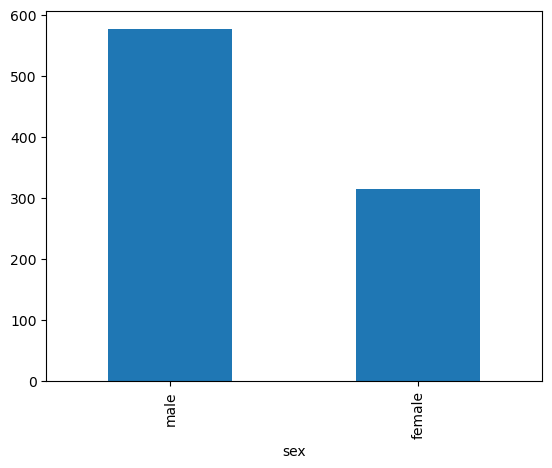

In [37]:
titanic['sex'].value_counts().plot(kind='bar')

- 나이별(age) 인원수

In [40]:
titanic["age"].value_counts().sort_index()
# titanic.age.value_counts()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='age'>

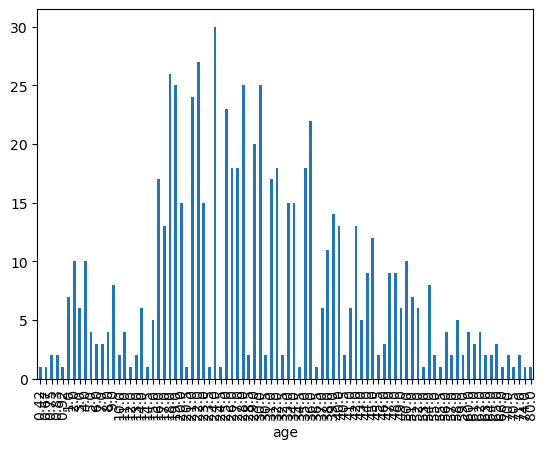

In [43]:
titanic["age"].value_counts().sort_index().plot(kind='bar')

- 선실별(class) 인원수

In [42]:
titanic["class"].value_counts()
# titanic.class.value_counts()  # class 는 예약어로... ".class"와 같은 방식으로는 인덱싱 불가

class
Third     491
First     216
Second    184
Name: count, dtype: int64

 - 사망/생존(alive) 인원수

In [43]:
titanic["alive"].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [44]:
titanic.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

## 행/열 합계

행과 열의 합계를 구할 때는 `sum(axis)` 메서드를 사용한다.

In [44]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


행 합계를 구할 때는 `sum(axis=1)` 메서드를 사용한다.

In [45]:
df2.sum(axis=1)  # 행 합계 = 열 추가 (열벡터가 판다스 시리즈 형태로 생김)

0    35
1    34
2    41
3    42
dtype: int64

In [46]:
type(df2.sum(axis=1))

pandas.core.series.Series

In [47]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


열 합계를 구할 때는 `sum(axis=0)` 메서드를 사용하는데 `axis`인수의 디폴트 값이 0이므로 `axis`인수를 생략할 수 있다.

In [48]:
df2.sum()
# df2.sum(axis=0)

0          24
1          33
2          25
3          24
4          15
5          10
6           5
7          16
RowSum    152
dtype: int64

In [49]:
df2.loc["ColTotal"] = df2.sum()
# df2.loc["ColTotal", :] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


---
`mean` 메서드는 평균을 구하며 `sum` 메서드와 사용법이 같다.

#### 연습 문제 4.4.3

1. 타이타닉호 승객의 평균 나이를 구하라.

In [50]:
titanic["age"].mean()

np.float64(29.69911764705882)

In [51]:
#반올림
round(titanic["age"].mean(),0)

np.float64(30.0)

In [59]:
titanic['age'].mean().round(0)

np.float64(30.0)

2. 타이타닉호 승객중 여성 승객의 평균 나이를 구하라.

In [52]:
titanic['age'][titanic['sex'] == 'female']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
880    25.0
882    22.0
885    39.0
887    19.0
888     NaN
Name: age, Length: 314, dtype: float64

In [53]:
titanic["age"][titanic["sex"] == "female"].count()

np.int64(261)

In [54]:
titanic["age"][titanic["sex"] == "female"].mean() # 여성승객 평균나이

np.float64(27.915708812260537)

In [55]:
titanic["age"][titanic["sex"] == "male"].mean() # 남성승객 평균나이

np.float64(30.72664459161148)

3. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.

In [56]:
titanic[(titanic["class"] == "First") & (titanic["sex"] == "female")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [57]:
titanic[(titanic["class"] == "First") & (titanic["sex"] == "female")]["age"]

1      38.0
3      35.0
11     58.0
31      NaN
52     49.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: age, Length: 94, dtype: float64

In [65]:
titanic[(titanic["class"] == "First") & (titanic["sex"] == "female")]["age"].mean()

np.float64(34.61176470588235)

---

## `apply` 변환

행이나 열 단위로 더 복잡한 처리를 하고 싶을 때는 `apply` 메서드를 사용한다. 인수로 행 또는 열을 받는 함수를 `apply` 메서드의 인수로 넣으면 각 열(또는 행)을 반복하여 그 함수에 적용시킨다. 

In [60]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


예를 들어 각 열의 최대값과 최소값의 차이를 구하고 싶으면 다음과 같은 람다 함수를 넣는다.

In [67]:
df3.max(), df3.min() #default axis = 0 열 기준

(A    4
 B    3
 C    5
 dtype: int64,
 A    1
 B    1
 C    1
 dtype: int64)

In [61]:
# df3의 axis=0의 기본으로 하나의 열씩 x에 차례로 대입이 되고 리턴값이 다시 pandas Series로 만들어짐
df3.apply(lambda x: x.max() - x.min())   # df3.max() - df3.min() 의 결과를 return

A    3
B    2
C    4
dtype: int64

In [70]:
df3.max() - df3.min()  # 위와 같음

A    3
B    2
C    4
dtype: int64

만약 행에 대해 적용하고 싶으면 `axis=1` 인수를 쓴다.

In [71]:
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [72]:
df3.max(axis=1) - df3.min(axis=1)  # 위와 같음

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [73]:
## 참고
df3.max(axis=1), df3.min(axis=1)

(0    2
 1    5
 2    4
 3    4
 4    4
 dtype: int64,
 0    1
 1    3
 2    1
 3    2
 4    3
 dtype: int64)

각 열에 대해 어떤 값이 얼마나 사용되었는지 알고 싶다면 `value_counts` 함수를 넣을 수도 있다.

In [74]:
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [64]:
df3.apply(pd.value_counts)  # A열에는 1이 1번, 2는 x, 3은 2번, 4는 2번, 5는 x 사용됨

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\2743097054.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df3.apply(pd.value_counts)  # A열에는 1이 1번, 2는 x, 3은 2번, 4는 2번, 5는 x 사용됨


,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [76]:
### 참고... sort_index()를 해서 index순서대로 정렬함
df3.A.value_counts().sort_index(), df3.B.value_counts().sort_index(), df3.C.value_counts().sort_index()

(A
 1    1
 3    2
 4    2
 Name: count, dtype: int64,
 B
 1    1
 2    2
 3    2
 Name: count, dtype: int64,
 C
 1    1
 2    1
 4    2
 5    1
 Name: count, dtype: int64)

---

다음과 같이 타이타닉호의 승객 중 나이 20살을 기준으로 성인(adult)과 미성년자(child)를 구별하는 라벨 열을 만들 수 있다.

In [77]:
titanic["adult/child"] = titanic.apply(lambda r: "adult" if r.age >= 20 else "child", axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


---

####  연습 문제 4.4.4

타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 `category1` 열을 만들어라. `category1` 카테고리는 다음과 같이 정의된다.

1. 20살 이상이면 성별을 그대로 사용한다.
2. 20살 미만이면 성별에 관계없이 "child"라고 한다.


In [65]:
titanic["category1"] = titanic.apply(lambda x: "child" if x.age < 20 else x.sex, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


---

In [66]:
titanic.age.isna().value_counts()   # NaN이 177개 (나이정보 없음)

age
False    714
True     177
Name: count, dtype: int64

In [67]:
## 평균나이
titanic.age.mean(), round(titanic.age.mean(),0)

(np.float64(29.69911764705882), np.float64(30.0))

In [68]:
a = 12.12345
round(a, 0)

12.0

In [69]:
titanic['age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [70]:
titanic[titanic.age < 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,child
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,child
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False,child
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False,child
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False,child


---
### `fillna` 메서드

NaN 값은 `fillna` 메서드를 사용하여 원하는 값으로 바꿀 수 있다.

In [71]:
df3.apply(pd.value_counts)  # A, B, C 열에 대해 각각 1, 2, 3, 4, 5가 몇 번 나오는지 count

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\1102723484.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df3.apply(pd.value_counts)  # A, B, C 열에 대해 각각 1, 2, 3, 4, 5가 몇 번 나오는지 count


,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [72]:
df3.apply(pd.value_counts).fillna(0.0) # in-place method??(아님!!)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\459794662.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df3.apply(pd.value_counts).fillna(0.0)


,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [73]:
data = np.array([[10, 12, 16, 18], [12, 16, 18, 20], [12, 16, 18, 22]])
df4 = pd.DataFrame(data,
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])
df4

,A,B,C,D
a,10,12,16,18
b,12,16,18,20
c,12,16,18,22


In [74]:
df4.apply(pd.value_counts)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\7501127.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df4.apply(pd.value_counts)


,A,B,C,D
10,1.0,NaN,NaN,NaN
12,2.0,1.0,NaN,NaN
16,NaN,2.0,1.0,NaN
18,NaN,NaN,2.0,1.0
20,NaN,NaN,NaN,1.0
22,NaN,NaN,NaN,1.0


In [75]:
# fillna(999)
df4.apply(pd.value_counts).fillna(999)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\348947553.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df4.apply(pd.value_counts).fillna(999)


,A,B,C,D
10,1.0,999.0,999.0,999.0
12,2.0,1.0,999.0,999.0
16,999.0,2.0,1.0,999.0
18,999.0,999.0,2.0,1.0
20,999.0,999.0,999.0,1.0
22,999.0,999.0,999.0,1.0


In [76]:
titanic.apply(pd.value_counts)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\4217631296.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  titanic.apply(pd.value_counts)
C:\Users\admin\AppData\Local\Temp\ipykernel_14512\4217631296.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  titanic.apply(pd.value_counts)
C:\Users\admin\AppData\Local\Temp\ipykernel_14512\4217631296.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  titanic.apply(pd.value_counts)
C:\Users\admin\AppData\Local\Temp\ipykernel_14512\4217631296.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  titanic.apply(pd.value_counts)
C:\Users\admin\AppData\Local\Temp\ipykernel_14512\4217631296.py:1: F

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,549.0,NaN,NaN,NaN,608.0,678.0,15.0,NaN,NaN,NaN,354.0,NaN,NaN,NaN,354.0,NaN
0.42,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.67,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.75,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.83,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
male,NaN,NaN,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,488.0
man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN
no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.0,NaN,NaN
woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.0,NaN,NaN,NaN,NaN,NaN,NaN


---

### 연습 문제 4.4.5

타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고쳐라.

In [77]:
titanic["age"] = titanic["age"].fillna(round(titanic.age.mean()))
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


In [78]:
titanic.age.value_counts()

age
30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [79]:
titanic[titanic.age.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1


---
## `astype` 메서드

`astype` 메서드로 전체 데이터의 자료형을 바꾸는 것도 가능하다.

In [80]:
df4.apply(pd.value_counts).fillna(0).astype(int)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\1676755837.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df4.apply(pd.value_counts).fillna(0).astype(int)


,A,B,C,D
10,1,0,0,0
12,2,1,0,0
16,0,2,1,0
18,0,0,2,1
20,0,0,0,1
22,0,0,0,1


In [87]:
df4.apply(pd.Series.value_counts, axis = 0).fillna(0).astype(int)

,A,B,C,D
10,1,0,0,0
12,2,1,0,0
16,0,2,1,0
18,0,0,2,1
20,0,0,0,1
22,0,0,0,1


---

### 연습 문제 4.4.6

타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 `category2` 열을 만들어라. `category2` 카테고리는 다음과 같이 정의된다.

1. 성별을 나타내는 문자열 `male` 또는 `female`로 시작한다.
2. 성별을 나타내는 문자열 뒤에 나이를 나타내는 문자열이 온다.
3. 예를 들어 27살 남성은 `male27` 값이 된다.

In [83]:
titanic.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [84]:
titanic.age.astype('int').astype('str')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: age, Length: 891, dtype: object

In [85]:
titanic.sex + titanic.age.astype('int').astype('str')

0        male22
1      female38
2      female26
3      female35
4        male35
         ...   
886      male27
887    female19
888    female30
889      male26
890      male32
Length: 891, dtype: object

In [86]:
titanic['category2'] = titanic.sex + titanic.age.astype('int').astype('str')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,male22
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,female38
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,female26
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,female35
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,male35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,male27
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,female19
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,female30
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,male26


## 실수 값을 카테고리 값으로 변환

실수 값을 크기 기준으로 하여 카테고리 값으로 변환하고 싶을 때는 다음과 같은 명령을 사용한다.

* `cut`: 실수 값의 경계선을 지정하는 경우
* `qcut`: 갯수가 똑같은 구간으로 나누는 경우

예를 들어 다음과 같은 나이 데이터가 있다고 하자.

In [88]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]

---

`cut` 명령을 사용하면 실수값을 다음처럼 카테고리 값으로 바꿀 수 있다. `bins` 인수는 카테고리를 나누는 기준값이 된다. 영역을 넘는 값은 NaN으로 처리된다.

In [89]:
bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
type(cats)  

pandas.core.arrays.categorical.Categorical

* pd.cut()으로 나오는 데이터  

    (1) 각 데이터가 어느 카테고리에 속하는지 리스트 형태로  

    (2) 총 데이터의 수 ( Length )  
    
    (3) 카테고리의 총 수와 형태  

In [90]:
cats # categories

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

* 슬라이스도 가능

In [91]:
cats[2:5]

['미성년자', '청년', '청년']
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

---

`cut` 명령이 반환하는 값은 `Categorical` 클래스 객체이다. 이 객체는 `categories` 속성으로 라벨 문자열을,  `codes` 속성으로 정수로 인코딩한 카테고리 값을 가진다.

In [92]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [93]:
cats.categories

Index(['미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [94]:
cats.codes   # category 범위 밖은 -1로 return  (각 데이터가 카테고리의 어느 클래스에 속하는지 인덱스로 return)

array([-1,  0,  0,  1,  1,  3,  2,  4,  1,  3,  2, -1], dtype=int8)

* pd.cut()을 사용하여데이터프레임에서 카테고리로 분류하여 새로운 컬럼을 만들 수 있다.

In [95]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

df5 = pd.DataFrame(ages, columns=["ages"]) # ages list를 DataFrame으로...
df5["age_cat"] = pd.cut(df5.ages, bins, labels=labels)
df5

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,중년
7,61,노년
8,20,청년
9,41,장년


---

`qcut` 명령은 구간 경계선을 지정하지 않고 데이터 갯수가 같도록 지정한 수의 구간으로 나눈다. 예를 들어 다음 코드는 1000개의 데이터를 4개의 구간으로 나누는데 각 구간은 250개씩의 데이터를 가진다.

* cut과 qcut과의 차이는...  
* cut은 두번째 인덱스로 bin으로 나눌 구간을 리스트로 주는데 반해...
* qcut은 두번째 인덱스로, 몇개의 구간으로 나눌지 개수를 준다. (자동으로 구간 설정)

In [96]:
number_of_bins = 4
data = np.random.randn(1000)
cats = pd.qcut(data, number_of_bins, labels=["Q1", "Q2", "Q3", "Q4"])
cats

['Q2', 'Q1', 'Q2', 'Q3', 'Q1', ..., 'Q1', 'Q1', 'Q4', 'Q4', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [97]:
pd.value_counts(cats)

C:\Users\admin\AppData\Local\Temp\ipykernel_14512\1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


Q1    250
Q2    250
Q3    250
Q4    250
Name: count, dtype: int64

In [98]:
# cats.value_counts()

---

#### 연습 문제 4.4.7
타이타닉호 승객을 ‘미성년자’, ‘청년’, ‘중년’, ‘장년’, ‘노년’ 나이 그룹으로 나눈다.  

```python
    bins = [1, 20, 30, 50, 70, 100]
    labels = ["미성년자", "청년", "중년", "장년", "노년"]
```

그리고 각 나이 그룹의 승객 비율을 구한다. 비율의 전체 합은 1이 되어야 한다.

In [99]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

cats = pd.cut(titanic["age"], bins, labels=labels)
cats

0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: age, Length: 891, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [100]:
## 각 나이 그룹별 인원 수
cats.value_counts()

age
청년      407
중년      241
미성년자    165
장년       59
노년        5
Name: count, dtype: int64

In [101]:
## 각 나이 그룹의 비율
group_ratio = cats.value_counts() / len(cats)
# group_ratio = cats.value_counts() / cats.count()
group_ratio

age
청년      0.456790
중년      0.270483
미성년자    0.185185
장년      0.066218
노년      0.005612
Name: count, dtype: float64

In [102]:
group_ratio.sum()  # total 1이 나옴

np.float64(0.9842873176206509)

In [103]:
## 여기서 각 그룹 비율의 합이 1이 되지 않음 ...

### Why?
### 1세 미만은 NaN으로 분류되기 때문
len(cats), cats.count()  # 두개 차이 남...

(891, np.int64(877))

In [104]:
titanic[titanic.age <= 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,category2
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,child,male0
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False,child,male1
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False,child,female1
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,child,male1
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,child,male0
381,1,3,female,1.00,0,2,15.7417,C,Third,child,False,NaN,Cherbourg,yes,False,child,female1
386,0,3,male,1.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False,child,male1
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child,female0
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False,child,female0
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False,child,male0


In [105]:
len(titanic[titanic.age <= 1])

14

In [106]:
## 정확히 14개 차이가 설명됨...
## 따라서.. 이 경우 카테고리를 나눌 때 
bins = [1, 20, 30, 50, 70, 100]
## 대신
bins = [0, 20, 30, 50, 70, 100]
## 을 사용하는 것이 바람직하다고 생각됨

### 연습 문제 4.4.8

타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인 `category3` 열을 만들어라. `category3` 카테고리는 다음과 같이 정의된다.

1. 20살 미만이면 성별에 관계없이 "미성년자"라고 한다.
2. 20살 이상이면 나이에 따라 "청년", "중년", "장년", "노년"을 구분하고 그 뒤에 성별을 나타내는 "남성", "여성"을 붙인다.


In [107]:
bins = [0, 20, 30, 50, 70, 100]   # 0부터...
labels = ["미성년자", "청년", "중년", "장년", "노년"]

cats = pd.cut(titanic["age"], bins, labels=labels)
cats

0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: age, Length: 891, dtype: category
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [108]:
titanic['cats'] = cats
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,category2,cats
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,male22,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,female38,중년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,female26,청년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,female35,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,male35,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,male27,청년
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,female19,미성년자
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,female30,청년
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,male26,청년


In [109]:
### 20세 미만이면 '미성년자'로 만들고, 그렇지 않으면 x.cats에 성별(x.sex)를 붙임

# lambda x: "미성년자" if x.age < 20 else x.cats + x.sex
titanic.apply(lambda x: "미성년자" if x.age < 20 else x.cats + x.sex, axis=1)

0        청년male
1      중년female
2      청년female
3      중년female
4        중년male
         ...   
886      청년male
887        미성년자
888    청년female
889      청년male
890      중년male
Length: 891, dtype: object

In [110]:
titanic.apply(lambda x: "미성년자" if x.age < 20 else x.cats + x.sex, axis=1)

0        청년male
1      중년female
2      청년female
3      중년female
4        중년male
         ...   
886      청년male
887        미성년자
888    청년female
889      청년male
890      중년male
Length: 891, dtype: object

In [111]:
titanic.apply(lambda x: "미성년자" if x.age < 20 else x.cats + ("여성" if x.sex == "female" else "남성"), axis=1)

0      청년남성
1      중년여성
2      청년여성
3      중년여성
4      중년남성
       ... 
886    청년남성
887    미성년자
888    청년여성
889    청년남성
890    중년남성
Length: 891, dtype: object

In [112]:
titanic['category3'] = titanic.apply(lambda x: "미성년자" if x.age < 20 else x.cats + ("여성" if x.sex == "female" else "남성"), axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,category2,cats,category3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,male22,청년,청년남성
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,female38,중년,중년여성
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,female26,청년,청년여성
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,female35,중년,중년여성
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,male35,중년,중년남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,male27,청년,청년남성
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,female19,미성년자,미성년자
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,female,female30,청년,청년여성
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,male26,청년,청년남성
